In [8]:
import json
import os
import matplotlib.pyplot as plt

In [9]:
#json_path = '/Users/zach/Desktop/training-16/training-01/00011-stylegan3-r-petals-1024x1024-01-gpus8-batch32-gamma4'

# 32.8 full training run
json_path = '/Users/zach/Desktop/training/training/training-02/00000-stylegan3-r-petals-1024x1024-01-gpus8-batch32-gamma32.8'

# 4 best
#json_path = '/Users/zach/Desktop/training-16/training-01/00011-stylegan3-r-petals-1024x1024-01-gpus8-batch32-gamma4'


# 42.1
# json_path = '/Users/zach/Desktop/training-32/training-03/00003-stylegan3-r-petals-1024x1024-01-gpus8-batch32-gamma42.1'

# latest - 32.8
files = [
    '/Users/zach/dev/petals/training/phase1/training-07/00001-stylegan2-petals1024x1024-gpus8-batch32-gamma6.5536'
]
metrics = []
scores = []

for json_path in files:
    with open(f'{json_path}/stats.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            metrics.append(json.loads(line))

    with open(f'{json_path}/metric-fid50k_full.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            scores.append(json.loads(line))

In [10]:
print(metrics[0].keys())

dict_keys(['Loss/scores/fake', 'Loss/signs/fake', 'Loss/G/loss', 'Loss/pl_penalty', 'Loss/G/reg', 'Loss/scores/real', 'Loss/signs/real', 'Loss/D/loss', 'Loss/r1_penalty', 'Loss/D/reg', 'Progress/tick', 'Progress/kimg', 'Timing/total_sec', 'Timing/sec_per_tick', 'Timing/sec_per_kimg', 'Timing/maintenance_sec', 'Resources/cpu_mem_gb', 'Resources/peak_gpu_mem_gb', 'Resources/peak_gpu_mem_reserved_gb', 'Progress/augment', 'Timing/total_hours', 'Timing/total_days', 'Timing/Gmain', 'Timing/Greg', 'Timing/Dmain', 'Timing/Dreg', 'timestamp'])


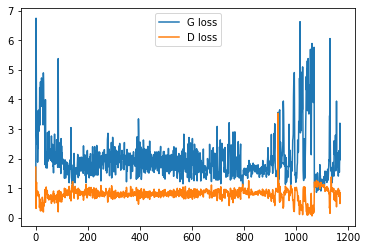

In [11]:
x = [i for i in range(len(metrics))]
g = [d['Loss/G/loss']['mean'] for d in metrics]
d = [d['Loss/D/loss']['mean'] for d in metrics]

plt.plot(x, g)
plt.plot(x, d)
plt.legend(['G loss', 'D loss'])
# plt.plot(x2, y2)

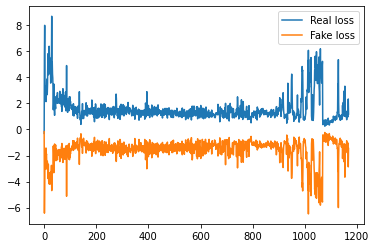

In [12]:
fake = [d['Loss/scores/fake']['mean'] for d in metrics]
real = [d['Loss/scores/real']['mean'] for d in metrics]
plt.plot(x, real)
plt.plot(x, fake)
plt.legend(['Real loss', 'Fake loss'])

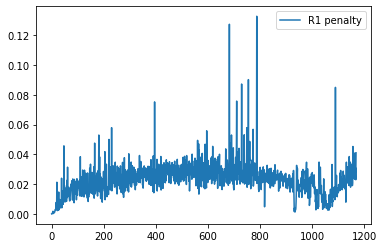

In [13]:
r1_penalty = [d['Loss/r1_penalty']['mean'] for d in metrics]
plt.plot(x, r1_penalty)
plt.legend(["R1 penalty"])

kimg: 4672.0322265625
FID: {100.96302838117646}


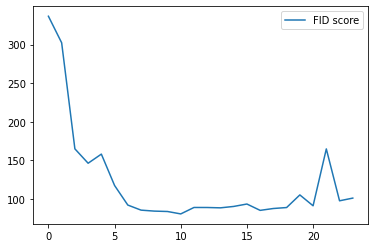

In [14]:
x_s = [i for i in range(len(scores))]
fid = [d['results']['fid50k_full'] for d in scores]
print("kimg:", metrics[-1]['Progress/kimg']['mean'])
print('FID:', {scores[-1]['results']['fid50k_full']})
plt.plot(x_s, fid)
plt.legend(["FID score"])